<a href="https://colab.research.google.com/github/11AJ/Machine-Learning/blob/main/Titanic_Survival_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th><th>Key</th></tr>
<tr><td>survival</td><td> Survival </td><td>0 = No, 1 = Yes</td></tr>
<tr><td>pclass</td> <td>Ticket class</td><td>1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
<tr><td>name </td><td>Passenger Name	</td></tr>
<tr><td>sex </td><td>Sex 	</td></tr>
<tr><td>Age </td><td>Age in years 	</td></tr>
<tr><td>sibsp </td><td>Number of siblings / spouses aboard the Titanic</td></tr>
<tr><td>parch </td><td>Number of parents / children aboard the Titanic</td></tr>
<tr><td>ticket </td><td>Ticket number</td></tr>
<tr><td>fare </td><td>Passenger fare </td></tr>
<tr><td>cabin </td><td>Cabin number </td></tr>
<tr><td>embarked </td><td>Port of Embarkation</td><td> C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>

#### Titanic dataset Survival Classification

1) Read the dataset<br>
2) Remove/handle null values<br>
3) Depict Survived column count on a countplot<br>
4) Depict Survived column count based on Sex on a countplot<br>
5) Depict Survived column count based on Pclass on a countplot<br>
6) Depict quartile distribution of Age column for each of Pclass categories<br>
7) Encode categorical varibles if any<br>
8) Select appropriate features and generate independent variables keeping 'Survived' column as dependent variable<br>
9) Split the dataset into training and testing data with test_size=25%<br>
10) Apply Logistic Regression and generate the predicted values for the test data<br>
11) Compute training and testing accuracy<br>
12) Generate confusion matrix. Also represnet it on heatmap<br>
13) Generate classifictaion_report<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1) Read the dataset

In [66]:
df=pd.read_csv('/content/titanic.csv')

In [67]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2) Remove/handle null values

In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('C011',inplace=True)
df['Embarked'].fillna('S',inplace=True)

In [70]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

3) Depict Survived column count on a countplot

In [71]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


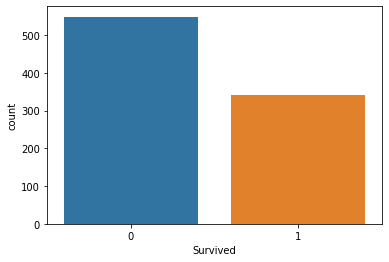

In [72]:
sns.countplot(df['Survived'])
plt.show()

4) Depict Survived column count based on Sex on a countplot

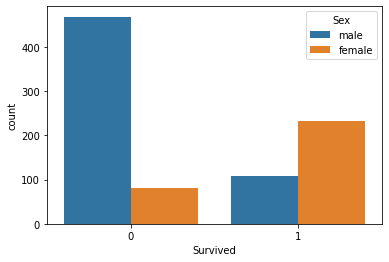

In [73]:
sns.countplot(x=df['Survived'],hue=df['Sex'])
plt.show()

5) Depict Survived column count based on Pclass on a countplot

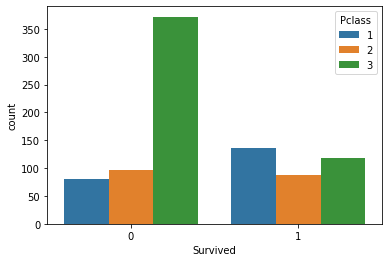

In [74]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])
plt.show()

6) Depict quartile distribution of Age column for each of Pclass categories

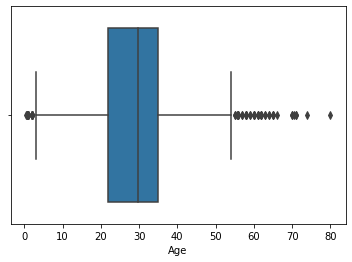

In [75]:
sns.boxplot(x=df['Age'],hue=df['Pclass'])
plt.show()

7) Encode categorical varibles if any

In [76]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C011,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C011,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C011,S


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le=LabelEncoder()

In [84]:
df['Name']=le.fit_transform(df['Name'])
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Cabin']=le.fit_transform(df['Cabin'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [85]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,48,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,82,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,48,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,56,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,48,2
5,6,0,3,554,1,29.699118,0,0,275,8.4583,48,1
6,7,0,1,515,1,54.000000,0,0,85,51.8625,130,2
7,8,0,3,624,1,2.000000,3,1,395,21.0750,48,2
8,9,1,3,412,0,27.000000,0,2,344,11.1333,48,2
9,10,1,2,576,0,14.000000,1,0,132,30.0708,48,0


8) Select appropriate features and generate independent variables keeping 'Survived' column as dependent variable

             PassengerId  Survived    Pclass  ...      Fare     Cabin  Embarked
PassengerId     1.000000 -0.005007 -0.035144  ...  0.012658 -0.018661  0.013128
Survived       -0.005007  1.000000 -0.338481  ...  0.257307  0.173286 -0.167675
Pclass         -0.035144 -0.338481  1.000000  ... -0.549500 -0.242997  0.162098
Name           -0.038559 -0.057343  0.052831  ... -0.049173  0.034857 -0.006117
Sex             0.042939 -0.543351  0.131900  ... -0.182333 -0.101665  0.108262
Age             0.033207 -0.069809 -0.331339  ...  0.091566  0.054283 -0.026749
SibSp          -0.057527 -0.035322  0.083081  ...  0.159651 -0.004940  0.068230
Parch          -0.001652  0.081629  0.018443  ...  0.216225  0.022286  0.039798
Ticket         -0.056554 -0.164549  0.319869  ... -0.013885 -0.070360 -0.001729
Fare            0.012658  0.257307 -0.549500  ...  1.000000  0.086433 -0.224719
Cabin          -0.018661  0.173286 -0.242997  ...  0.086433  1.000000  0.025475
Embarked        0.013128 -0.167675  0.16

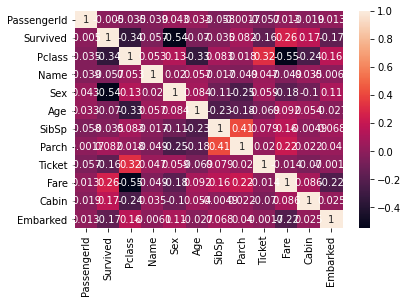

In [89]:
print(df.corr())
sns.heatmap(df.corr(),annot=True)
plt.show()

In [96]:
x=df[['Parch','Fare','Cabin']]
y=df['Survived']

9) Split the dataset into training and testing data with test_size=25%

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

10) Apply Logistic Regression and generate the predicted values for the test data

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
model=LogisticRegression()

In [102]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_pred=model.predict(x_test)

In [107]:
y_pred[0:5]

array([0, 0, 1, 0, 0])

11) Compute training and testing accuracy

In [108]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.6766467065868264
0.6816143497757847


12) Generate confusion matrix. Also represnet it on heatmap

In [121]:
from sklearn.metrics import confusion_matrix,classification_report

In [122]:
print(confusion_matrix(y_test,y_pred))

[[119  12]
 [ 59  33]]


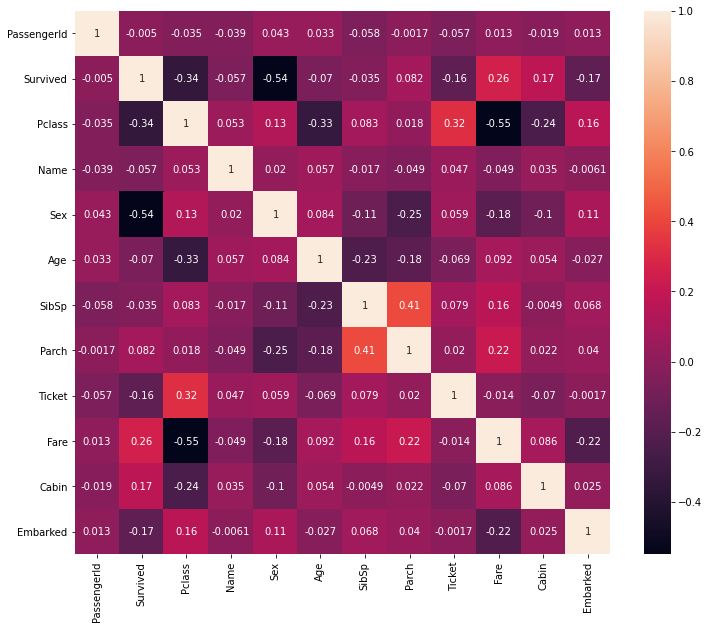

In [123]:
fig = plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(df.corr(),annot=True)
plt.show()

13) Generate classifictaion_report

In [124]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       178
           1       0.36      0.73      0.48        45

    accuracy                           0.68       223
   macro avg       0.63      0.70      0.63       223
weighted avg       0.80      0.68      0.71       223

